In [ ]:
#liên kết với gg drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2 as cv #thêm thư viện opencv
import numpy as np #thêm thư viện numpy
import os #lấy đường dẫn tới thư mục chứa hình ảnh
import matplotlib.pyplot as plt #thêm thư viện matplotlib

In [ ]:
from keras.preprocessing import  image
from keras.preprocessing.image import load_img,img_to_array
#đưa đường dẫn vào thư viện hình ảnh đã được up lên gg drive
dir_folder = '/content/drive/MyDrive/trainfood'
#tạo list chứa data và label
labels = []
x_train = []
y_train = []
path_img=[]
# tạo dữ liệu train
for i in os.listdir(dir_folder):
  path = os.path.join(dir_folder, i)
  labels.append(str(i))
  for j in os.listdir(path):
    path_img.append(os.path.join(path,j))
    y_train.append(labels.index(i))
    img = image.load_img(os.path.join(path, j), target_size=(150,150)) 
    img = img_to_array(img)
    img = img.reshape(150,150,3) 
    img = img.astype('float32')
    img = img/255
    x_train.append(img)

In [ ]:
#chuyển list data thành dạng array
x_train = np.array(x_train)
#chuyển list label thành dạng array 
y_train = np.array(y_train)

In [ ]:
#kiểm tra shape của tensor X (bacth,Width,height,chanel)
x_train.shape

(989, 150, 150, 3)

In [ ]:
# kiểm tra shape của y
y_train.shape

(989,)

In [ ]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [ ]:
#tăng dữ liệu đầu vào bằng cách lật hình và xoay hình
import tensorflow as tf
x_l_r =[]
y_l_r =[]

for i in range(x_train.shape[0]):
  xi = tf.image.flip_left_right(x_train[i])
  yi =y_train[i]
  x_l_r.append(xi)
  y_l_r.append(yi)

In [ ]:
x_l_r=np.array(x_l_r)
y_l_r=np.array(y_l_r)

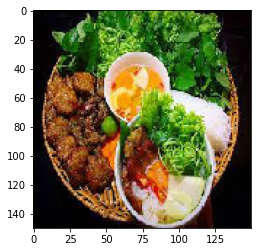

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_l_r[0])

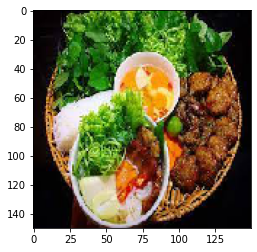

In [ ]:
plt.imshow(x_train[0])

In [ ]:
y_l_r

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [ ]:
x_u_d =[]
y_u_d =[]

for i in range(x_train.shape[0]):
  xi = tf.image.flip_up_down(x_train[i])
  yi =y_train[i]
  x_u_d.append(xi)
  y_u_d.append(yi)

In [ ]:
x_u_d=np.array(x_u_d)
y_u_d=np.array(y_u_d)

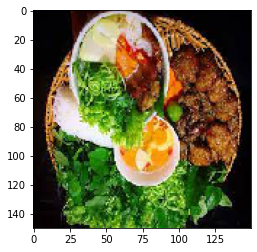

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_u_d[0])

In [ ]:
#hợp nhất chúng lại để tạo thư viện có nhiều hình hơn
X = np.concatenate((x_train,x_l_r,x_u_d))
y = np.concatenate((y_train,y_l_r,y_u_d))

In [ ]:
X.shape

(2967, 150, 150, 3)

In [ ]:
y.shape

(2967,)

In [ ]:
#xáo trộn trật tự của dữ liệu và nhãn
keys = np.array(range(X.shape[0]))
np.random.shuffle(keys)
X = X[keys]
y = y[keys]

In [ ]:
y

array([9, 4, 9, ..., 8, 9, 4])

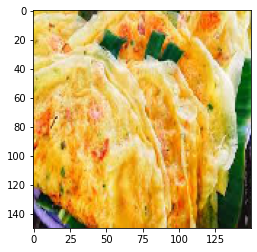

In [ ]:
plt.imshow(X[2])


In [ ]:
from tensorflow.keras.utils import to_categorical
#đưa label vào dạng onehot 
y= to_categorical(y,10)

In [ ]:
X.shape

(2967, 150, 150, 3)

In [ ]:
y.shape

(2967,)

In [ ]:
#xây dựng model cho việc training
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
model = Sequential()

model.add(Conv2D(filters=32,  kernel_size=(5,5), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(150,150,3), strides=(2,2)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(filters=64,  kernel_size=(5,5),  activation='relu', kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(filters=128,kernel_size=(5,5),  activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(512, activation='relu')) 
model.add(Dense(1028, activation='relu'))
model.add(Dense(1028, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 75, 75, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 37, 37, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 18, 18, 128)       204928    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 9, 9, 128)        0

In [ ]:
#gọi hàm loss
from keras.backend import categorical_crossentropy
#gọi opimizer
from tensorflow.keras.optimizers import Adam,SGD

#opt= SGD(lr=0.01,momentum=0.9)
#sử dụng optimizer Adam
opt =Adam()
#cấu hình train
model.compile(opt,loss='categorical_crossentropy',metrics=['accuracy'])
#bỏ dữ liệu vô train
history = model.fit(X, y, epochs=50, batch_size=64, validation_split=(0.1), verbose=1)
#lưu model
model.save('final.h5')

Epoch 1/50
42/42 [==============================] - 5s 42ms/step - loss: 2.7165 - accuracy: 0.1397 - val_loss: 1.9829 - val_accuracy: 0.2896
Epoch 2/50
42/42 [==============================] - 1s 28ms/step - loss: 1.8108 - accuracy: 0.3285 - val_loss: 1.7247 - val_accuracy: 0.3502
Epoch 3/50
42/42 [==============================] - 1s 28ms/step - loss: 1.5018 - accuracy: 0.4345 - val_loss: 1.4246 - val_accuracy: 0.4848
Epoch 4/50
42/42 [==============================] - 1s 28ms/step - loss: 1.2538 - accuracy: 0.5397 - val_loss: 1.2220 - val_accuracy: 0.5522
Epoch 5/50
42/42 [==============================] - 1s 28ms/step - loss: 1.0273 - accuracy: 0.6352 - val_loss: 1.0490 - val_accuracy: 0.6061
Epoch 6/50
42/42 [==============================] - 1s 30ms/step - loss: 0.7892 - accuracy: 0.7225 - val_loss: 1.2460 - val_accuracy: 0.6128
Epoch 7/50
42/42 [==============================] - 1s 28ms/step - loss: 0.6287 - accuracy: 0.7850 - val_loss: 1.2170 - val_accuracy: 0.6061
Epoch 8/50
42

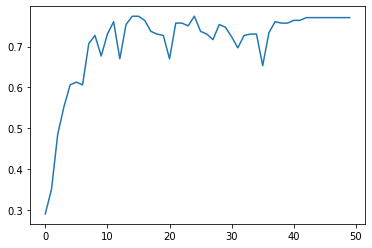

In [ ]:
import matplotlib.pyplot as plt 
#vẽ đồ thị độ chính xác của tập test
plt.plot(history.history['val_accuracy'])

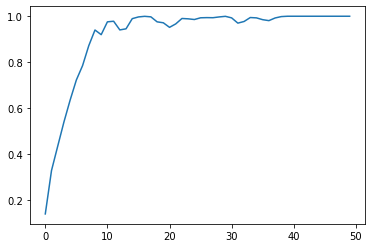

In [ ]:
import matplotlib.pyplot as plt 
#vẽ đồ thị độ chính xác của tập train
plt.plot(history.history['accuracy'])

Món ăn nằm ngoài tập train


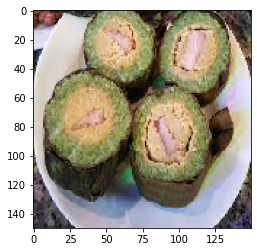

In [ ]:
import numpy as np
from numpy import argmax
from keras.saving.save import load_model
#load model
model5= load_model('final.h5')
from keras.preprocessing.image import load_img,img_to_array
#tạo dictionary
labels= {0:'bún chả',
         1:'bánh mì',
         2:'bánh chưng',
         3:'bún dậu',
         4:'cơm gà',
         5:'cơm tấm',
         6:'phở',
         7:'thịt kho',
         8:'xôi mặn',
         9:'bánh xèo'}
#load ảnh resize 50x50
img= load_img('banhtet2.jpg',target_size=(150,150))
#show hình ảnh
plt.imshow(img)
img= img_to_array(img)
img= cv.GaussianBlur(img,(505,505),0,0)
#reshape ảnh màu thành tensor 1x50x50x3
img= img.reshape(1,150,150,3)
img=img/255
#dự đoán kết quả
result= model5.predict(img)
np.argmax(model5.predict(img),axis=1)
if np.max(result)>0.6:
  print('Món ăn dự đoán:',labels[np.argmax(result)])
  print('Độ chính xác:',int(np.max(result)*100) ,'%') 
else:
  print('Món ăn nằm ngoài tập train')

Món ăn dự đoán: bánh chưng
Độ chính xác: 100 %


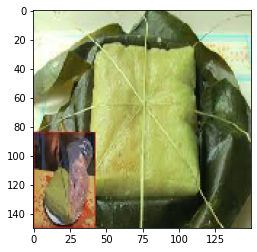

In [ ]:
import numpy as np
from numpy import argmax
from keras.saving.save import load_model
#load model
model5= load_model('final.h5')
from keras.preprocessing.image import load_img,img_to_array
#tạo dictionary
labels= {0:'bún chả',
         1:'bánh mì',
         2:'bánh chưng',
         3:'bún dậu',
         4:'cơm gà',
         5:'cơm tấm',
         6:'phở',
         7:'thịt kho',
         8:'xôi mặn',
         9:'bánh xèo'}
#load ảnh resize 50x50
img= load_img('chung.jpg',target_size=(150,150))
#show hình ảnh
plt.imshow(img)
img= img_to_array(img)
img= cv.GaussianBlur(img,(505,505),0,0)
#reshape ảnh màu thành tensor 1x50x50x3
img= img.reshape(1,150,150,3)
#dự đoán kết quả
result= model5.predict(img)
np.argmax(model5.predict(img),axis=1)

if np.max(result)>0.6:
  print('Món ăn dự đoán:',labels[np.argmax(result)])
  print('Độ chính xác:',int(np.max(result)*100) ,'%') 
else:
  print('Món ăn nằm ngoài tập train')


Món ăn dự đoán: cơm gà
Độ chính xác: 100 %


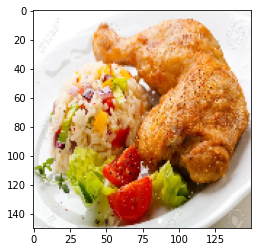

In [ ]:
import numpy as np
from numpy import argmax
from keras.saving.save import load_model
#load model
model5= load_model('final.h5')
from keras.preprocessing.image import load_img,img_to_array
#tạo dictionary
labels= {0:'bún chả',
         1:'bánh mì',
         2:'bánh chưng',
         3:'bún dậu',
         4:'cơm gà',
         5:'cơm tấm',
         6:'phở',
         7:'thịt kho',
         8:'xôi mặn',
         9:'bánh xèo'}
#load ảnh resize 50x50
img= load_img('comga.webp',target_size=(150,150))
#show hình ảnh
plt.imshow(img)
img= img_to_array(img)
img= cv.GaussianBlur(img,(55,55),0,0)
#reshape ảnh màu thành tensor 1x50x50x3
img= img.reshape(1,150,150,3)
#dự đoán kết quả
result= model5.predict(img)
np.argmax(model5.predict(img),axis=1)

if np.max(result)>0.6:
  print('Món ăn dự đoán:',labels[np.argmax(result)])
  print('Độ chính xác:',int(np.max(result)*100) ,'%') 
else:
  print('Món ăn nằm ngoài tập train')